# Tarefa 1 - Flight Price

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('./datasets/flight_price.csv')

In [4]:
data

,serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data Treatment

In [5]:
data.drop(columns=['serial_number', 'flight'], inplace=True)

In [6]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [8]:
data.isna().any()

airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [9]:
data.duplicated().sum()

2213

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [13]:
data.shape

(297940, 10)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


### Transform the data

#### One-Hot Encoding

In [27]:
from sklearn.preprocessing import LabelBinarizer

data_OHE = data.copy()

features_to_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']


lb = LabelBinarizer()
for f in features_to_encode:
    data_LB = lb.fit_transform(data[f])
    data_LB_df = pd.DataFrame(data_LB, columns=[f'{f}_{classe}' for classe in lb.classes_])

    data_OHE = pd.concat([data_OHE, data_LB_df], axis=1)
    data_OHE.dropna(inplace=True)
    
data_OHE.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,1


In [28]:
data_OHE.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
297935,Vistara,Chennai,Night,one,Morning,Kolkata,Business,11.25,46.0,73297.0,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0
297936,Vistara,Chennai,Evening,one,Morning,Kolkata,Business,14.92,46.0,73297.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,0
297937,Air_India,Chennai,Morning,zero,Afternoon,Kolkata,Business,2.58,47.0,20000.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,0
297938,Air_India,Chennai,Evening,one,Morning,Kolkata,Business,12.92,47.0,34432.0,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0
297939,Air_India,Chennai,Afternoon,one,Night,Kolkata,Business,8.33,47.0,54481.0,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0


In [29]:
data_OHE.isna().sum()

airline                         0
source_city                     0
departure_time                  0
stops                           0
arrival_time                    0
destination_city                0
class                           0
duration                        0
days_left                       0
price                           0
airline_AirAsia                 0
airline_Air_India               0
airline_GO_FIRST                0
airline_Indigo                  0
airline_SpiceJet                0
airline_Vistara                 0
source_city_Bangalore           0
source_city_Chennai             0
source_city_Delhi               0
source_city_Hyderabad           0
source_city_Kolkata             0
source_city_Mumbai              0
departure_time_Afternoon        0
departure_time_Early_Morning    0
departure_time_Evening          0
departure_time_Late_Night       0
departure_time_Morning          0
departure_time_Night            0
stops_one                       0
stops_two_or_m

In [30]:
data_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295727 entries, 0 to 297939
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   airline                       295727 non-null  object 
 1   source_city                   295727 non-null  object 
 2   departure_time                295727 non-null  object 
 3   stops                         295727 non-null  object 
 4   arrival_time                  295727 non-null  object 
 5   destination_city              295727 non-null  object 
 6   class                         295727 non-null  object 
 7   duration                      295727 non-null  float64
 8   days_left                     295727 non-null  float64
 9   price                         295727 non-null  float64
 10  airline_AirAsia               295727 non-null  float64
 11  airline_Air_India             295727 non-null  float64
 12  airline_GO_FIRST              295727 non-null  fl

In [31]:
data_OHE.drop(columns=features_to_encode, inplace=True)

### Lable Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data_OHE['class'] = lb.fit_transform(data_OHE['class'])

In [33]:
data_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295727 entries, 0 to 297939
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   class                         295727 non-null  int32  
 1   duration                      295727 non-null  float64
 2   days_left                     295727 non-null  float64
 3   price                         295727 non-null  float64
 4   airline_AirAsia               295727 non-null  float64
 5   airline_Air_India             295727 non-null  float64
 6   airline_GO_FIRST              295727 non-null  float64
 7   airline_Indigo                295727 non-null  float64
 8   airline_SpiceJet              295727 non-null  float64
 9   airline_Vistara               295727 non-null  float64
 10  source_city_Bangalore         295727 non-null  float64
 11  source_city_Chennai           295727 non-null  float64
 12  source_city_Delhi             295727 non-null  fl

### Factorize

In [34]:
data_FAC = data.copy()

features_to_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']

for f in features_to_encode:
    data_FAC[f] = pd.factorize(data_FAC[f]) [0] + 1

data_FAC.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,1,1,1,1,1,Economy,2.17,1,5953
1,1,1,2,1,2,1,Economy,2.33,1,5953
2,2,1,2,1,3,1,Economy,2.17,1,5956
3,3,1,3,1,4,1,Economy,2.25,1,5955
4,3,1,3,1,2,1,Economy,2.33,1,5955


### Lable Encoding

In [35]:
lb = LabelEncoder() 
data_FAC['class'] = lb.fit_transform(data_FAC['class'])

In [36]:
data_FAC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  int64  
 1   source_city       297940 non-null  int64  
 2   departure_time    297940 non-null  int64  
 3   stops             297940 non-null  int64  
 4   arrival_time      297940 non-null  int64  
 5   destination_city  297940 non-null  int64  
 6   class             297940 non-null  int32  
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 31.9 MB


### Test Train Split

#### One-Hot Encoded Data

In [37]:
X_OHE = data_OHE.drop('price', axis=1)
y_OHE = data_OHE[['price']]

#### Factorized Data

In [38]:
X_FAC = data_FAC.drop('price', axis=1)
y_FAC = data_FAC[['price']]

#### Normalize

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

encoding = 1 # 0 -> One-Hot Encoding | 1 -> Factorize

if encoding == 0: # One-Hot Encoding
    scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_OHE)
    scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y_OHE)
    X_scaled = pd.DataFrame(scaler_X.transform(X_OHE[X_OHE.columns]), columns=X_OHE.columns)
    y_scaled = pd.DataFrame(scaler_y.transform(y_OHE[y_OHE.columns]), columns=y_OHE.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=2023)
    y_test = scaler_y.inverse_transform(y_test)

elif encoding == 1: # Factorize
    scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_FAC)
    scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y_FAC)
    X_scaled = pd.DataFrame(scaler_X.transform(X_FAC[X_FAC.columns]), columns=X_FAC.columns)
    y_scaled = pd.DataFrame(scaler_y.transform(y_FAC[y_FAC.columns]), columns=y_FAC.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=2023)
    y_test = scaler_y.inverse_transform(y_test)

else: # Not Normalized
    X_train, X_test, y_train, y_test = train_test_split(X_FAC, y_FAC, test_size=0.25, random_state=2023)

### Denormalize

In [40]:
def denormalize(prediction, encoding=1):
    if encoding == 0:
        prediction = prediction.reshape(prediction.shape[0], 1)
        prediction = scaler_y.inverse_transform(prediction)

    elif encoding == 1:
        prediction = prediction.reshape(prediction.shape[0], 1)
        prediction = scaler_y.inverse_transform(prediction)
    
    return prediction

In [41]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Aux Functions

In [42]:
def printMetrics(prediction):
    print('Mean Absolute Error: ',end='')
    print(mean_absolute_error(y_test, prediction))
    
    print('\nMean Squared Error: ', end='')
    print(mean_squared_error(y_test, prediction, squared=True))
    
    print('\nRoot Mean Squared Error: ', end='')
    print(mean_squared_error(y_test, prediction, squared=False))


def plotPrediction(prediction):
    plt.scatter(y_test, prediction)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Comparison of Predicted vs Actual values')

## Modeling

### Regressão Linear

#### Hold-out Validation

In [43]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2023)

dtr.fit(X_train, y_train)
predictionDTR = dtr.predict(X_test)

predictionDTR = denormalize(predictionDTR, encoding)

In [44]:
printMetrics(predictionDTR)

Mean Absolute Error: 1201.0260477501095

Mean Squared Error: 12340414.261325173

Root Mean Squared Error: 3512.8925775385123


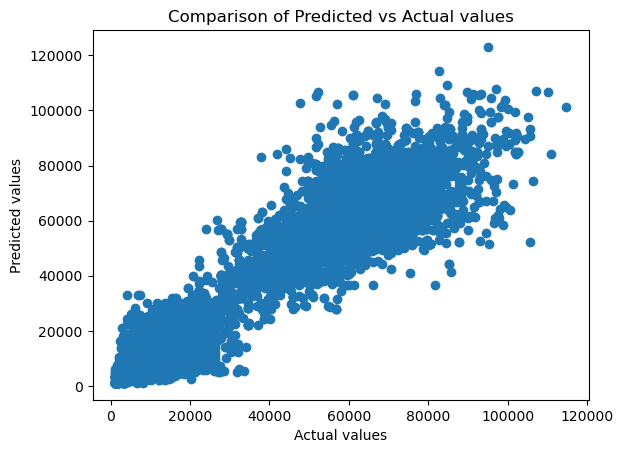

In [45]:
plotPrediction(predictionDTR)

#### GridSearch

In [46]:
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random']
}

grid_searchDTR = GridSearchCV(dtr, param_grid, cv=5, refit=True, verbose=3)
grid_searchDTR.fit(X_train, y_train)
grid_predictionDTR = grid_searchDTR.predict(X_test)


print("Best estimator: ", grid_searchDTR.best_estimator_)


grid_predictionDTR = denormalize(grid_predictionDTR, encoding)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........criterion=mse, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END ........criterion=mse, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END ........criterion=mse, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END ........criterion=mse, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END ........criterion=mse, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END ......criterion=mse, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END ......criterion=mse, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END ......criterion=mse, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END ......criterion=mse, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END ......criterion=mse, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=friedman_mse, splitter=best;, score=0.974 total time=   0.4s
[CV 2/5] END criterion=friedman_mse, splitter=

In [47]:
printMetrics(grid_predictionDTR)

Mean Absolute Error: 1201.1122597391004

Mean Squared Error: 12325468.040344438

Root Mean Squared Error: 3510.7645948346403


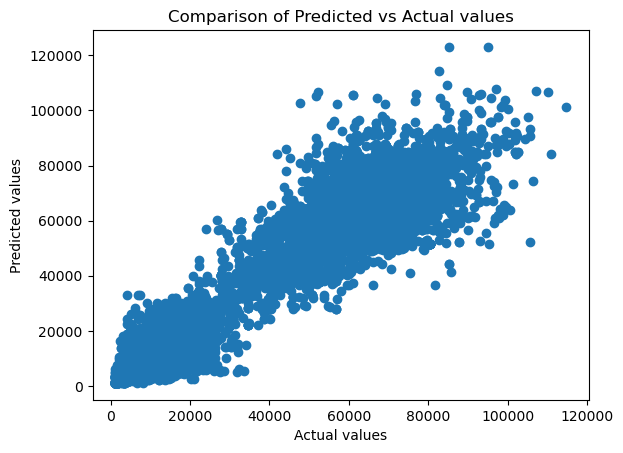

In [48]:
plotPrediction(grid_predictionDTR)

### Random Forest

#### Hold-out Validation

In [49]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
predictionRFR = rfr.predict(X_test)

predictionRFR = denormalize(predictionRFR, encoding)

printMetrics(predictionRFR)

Mean Absolute Error: 1098.7642419346087

Mean Squared Error: 7576475.795407344

Root Mean Squared Error: 2752.539880802337


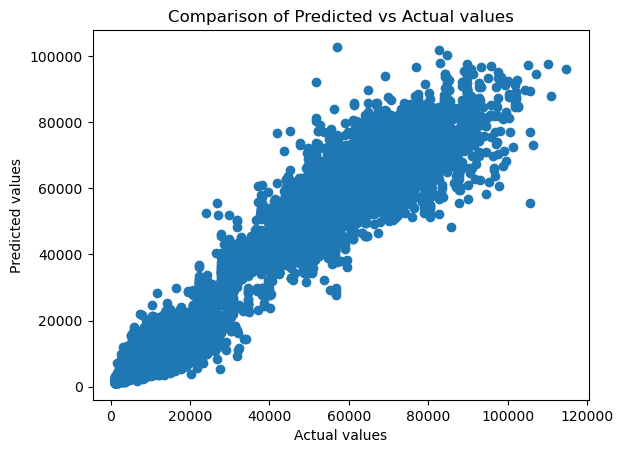

In [50]:
plotPrediction(predictionRFR)

#### GridSearch

In [66]:
param_grid = {
    'n_estimators': [700, 725],
    'max_features': ['sqrt'],
}

grid_searchRFR = GridSearchCV(rfr, param_grid, cv=2, refit=True, verbose=3)
grid_searchRFR.fit(X_train, y_train)
grid_predictionRFR = grid_searchRFR.predict(X_test)

grid_predictionRFR = denormalize(grid_predictionRFR, encoding)

print("Best estimator: ", grid_searchRFR.best_estimator_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END .max_features=auto, n_estimators=650;, score=nan total time=   0.0s
[CV 2/2] END .max_features=auto, n_estimators=650;, score=nan total time=   0.0s
[CV 1/2] END .max_features=auto, n_estimators=700;, score=nan total time=   0.0s
[CV 2/2] END .max_features=auto, n_estimators=700;, score=nan total time=   0.0s
[CV 1/2] END .max_features=auto, n_estimators=750;, score=nan total time=   0.0s
[CV 2/2] END .max_features=auto, n_estimators=750;, score=nan total time=   0.0s
[CV 1/2] END max_features=sqrt, n_estimators=650;, score=0.983 total time= 1.4min
[CV 2/2] END max_features=sqrt, n_estimators=650;, score=0.983 total time= 1.4min
[CV 1/2] END max_features=sqrt, n_estimators=700;, score=0.983 total time= 1.5min
[CV 2/2] END max_features=sqrt, n_estimators=700;, score=0.983 total time= 1.5min
[CV 1/2] END max_features=sqrt, n_estimators=750;, score=0.983 total time= 1.7min
[CV 2/2] END max_features=sqrt, n_estimators

In [69]:
printMetrics(grid_predictionRFR)

Mean Absolute Error: 1211.7219949261168

Mean Squared Error: 7862234.497419074

Root Mean Squared Error: 2803.9676348736757


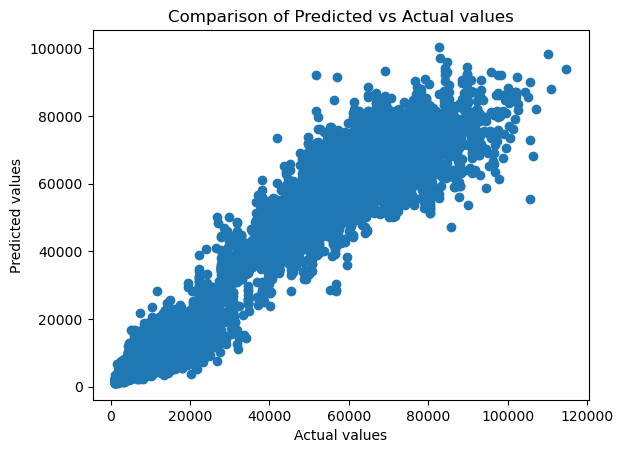

In [70]:
plotPrediction(grid_predictionRFR)

### Multilayer Perceptron

#### Build Model

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [72]:
X_train.shape[1]

9

In [73]:
def build_model(activation = 'relu', learning_rate = 0.01, input_dim=9): # To get input_dim: X.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation=activation)) #output

    # Compile the model

    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    return model

In [74]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [75]:
from sklearn.model_selection import KFold

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

model = KerasRegressor(model = build_model, batch_size=32, epochs=20, validation_split = 0.2)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error', verbose=1, refit=True)

In [76]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
4470/4470 [==============================] - 3s 609us/step - loss: 0.1632 - mae: 0.1632 - mse: 0.0615 - val_loss: 0.1638 - val_mae: 0.1638 - val_mse: 0.0618
Epoch 2/20
4470/4470 [==============================] - 3s 600us/step - loss: 0.1632 - mae: 0.1632 - mse: 0.0615 - val_loss: 0.1638 - val_mae: 0.1638 - val_mse: 0.0618
Epoch 3/20
4470/4470 [==============================] - 3s 608us/step - loss: 0.1632 - mae: 0.1632 - mse: 0.0615 - val_loss: 0.1638 - val_mae: 0.1638 - val_mse: 0.0618
Epoch 4/20
4470/4470 [==============================] - 3s 605us/step - loss: 0.1632 - mae: 0.1632 - mse: 0.0615 - val_loss: 0.1638 - val_mae: 0.1638 - val_mse: 0.0618
Epoch 5/20
4470/4470 [==============================] - 3s 591us/step - loss: 0.1632 - mae: 0.1632 - mse: 0.0615 - val_loss: 0.1638 - val_mae: 0.1638 - val_mse: 0.0618
Epoch 6/20
4470/4470 [==============================] - 3s 619us/step - loss: 0.1632 - mae: 0.1632 -

GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x000002CF49E6FB50>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='neg_mean_absolute_error', verbose=1)

In [77]:
print('Best: %f using %s' % (grid_search.best_score_, grid_search.best_params_))

Best: -0.053912 using {'optimizer': 'RMSprop'}


In [78]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x000002CF49E6FB50>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [79]:
best_mlp_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
6983/6983 [==============================] - 5s 664us/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0613 - val_loss: 20991.0938 - val_mae: 20991.0938 - val_mse: 957213120.0000
Epoch 2/20
6983/6983 [==============================] - 4s 635us/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0613 - val_loss: 20991.0938 - val_mae: 20991.0938 - val_mse: 957213120.0000
Epoch 3/20
6983/6983 [==============================] - 4s 632us/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0613 - val_loss: 20991.0938 - val_mae: 20991.0938 - val_mse: 957213120.0000
Epoch 4/20
6983/6983 [==============================] - 4s 630us/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0613 - val_loss: 20991.0938 - val_mae: 20991.0938 - val_mse: 957213120.0000
Epoch 5/20
6983/6983 [==============================] - 5s 651us/step - loss: 0.1629 - mae: 0.1629 - mse: 0.0613 - val_loss: 20991.0938 - val_mae: 20991.0938 - val_mse: 957213120.0000
Epoch 6/20
6983/6983 [==============================] - 5s 669us/step - loss: 0.

KerasRegressor(
	model=<function build_model at 0x000002CF49E6FB50>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

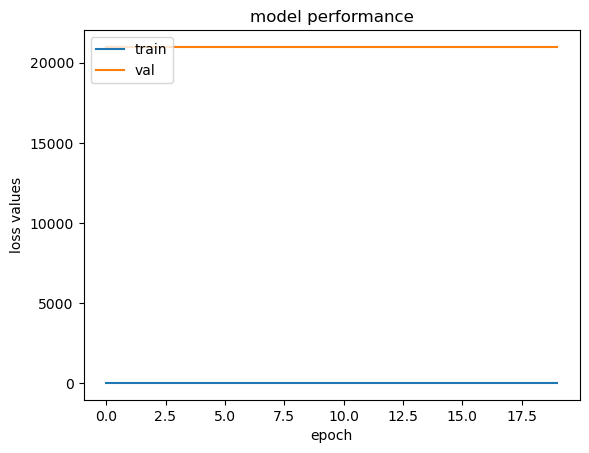

In [80]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss']) 
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
prediction = best_mlp_model.predict(X_test)
prediction = denormalize(prediction, encoding)

2328/2328 [==============================] - 1s 396us/step


In [82]:
printMetrics(prediction)

Mean Absolute Error: 19886.101282137344

Mean Squared Error: 912045130.6367188

Root Mean Squared Error: 30200.084944197075


In [83]:
prediction

array([[1105.],
       [1105.],
       [1105.],
       ...,
       [1105.],
       [1105.],
       [1105.]], dtype=float32)

In [84]:
y_test

array([[51457.],
       [ 6461.],
       [ 4001.],
       ...,
       [ 4783.],
       [ 3496.],
       [14962.]])

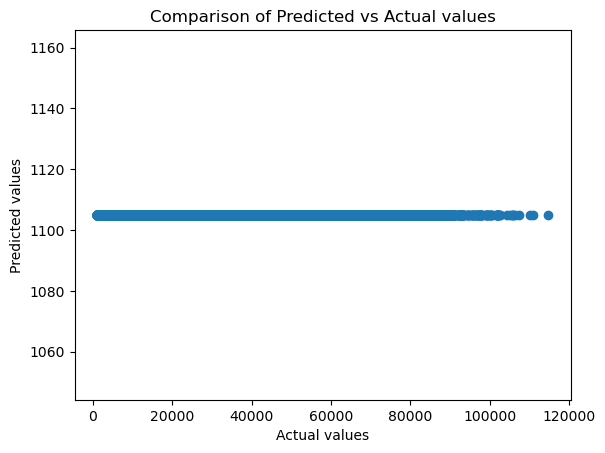

In [85]:
plotPrediction(prediction)